# Data Assessment & Analytics - Regulatory Data
Notes:
- change os directory location
- be aware of the number of provdied native source data files

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import geoplot as gplt  # for plotting maps and geo-data
import geoplot.crs as gcrs  #used to pull in webdata related to maps and geo-data
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go  # for subplot creation
from plotly.subplots import make_subplots  # for subplot creation
import matplotlib.pyplot as mplt  # use with gplt to save fig to pdf

# ---- cleanup ----
import re # string regular expression manipulation
from datetime import datetime # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = os.getcwd() # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\NewMexico\Regulatory


In [3]:
# ---- where to find input files ----
InputFolderString = "G:/Shared drives/WaDE Data/NewMexico/Regulatory" # set this to where input files are located

In [4]:
# Native Input Data
#################################################################
# ---- This needs to be custom per state ----

# Data Set 1: WaterRightRegulations
dfin1 = pd.read_csv(InputFolderString + "/RawinputData/WaterRightRegulations.zip")
                    
# Data Set 2: NMSoilWaterConservationDistricts
dfin2 = pd.read_csv(InputFolderString + "/RawinputData/NMSoilWaterConservationDistricts.zip")

In [5]:
# WaDE Processed Input Data
#################################################################

dfru = pd.read_csv(InputFolderString + "/ProcessedInputData/reportingunits.csv").replace(np.nan, "")
dfrupurge = pd.read_csv(InputFolderString + "/ProcessedInputData/reportingunits_missing.csv").replace(np.nan, "")

dfro = pd.read_csv(InputFolderString + "/ProcessedInputData/regulatoryoverlays.csv").replace(np.nan, "")
dfropurge = pd.read_csv(InputFolderString + "/ProcessedInputData/regulatoryoverlays_missing.csv").replace(np.nan, "")

dfs = pd.read_csv(InputFolderString + "/ProcessedInputData/sites.csv").replace(np.nan, "")

# Reporting Unit Info
- reportingunits.csv

In [6]:
print(len(dfru))
dfru.head(1)

249


,ReportingUnitUUID,EPSGCodeCV,ReportingUnitName,ReportingUnitNativeID,ReportingUnitProductVersion,ReportingUnitTypeCV,ReportingUnitUpdateDate,StateCV,Geometry
0,NMre_RU0SWCDb,4326,Border,0SWCDb,,Soil Water Conservation District,,NM,MULTIPOLYGON (((-103.63156317460079 33.6197811...


In [8]:
# # Check what columns contain missing information.
# msno.matrix(dfru, figsize=(10,5), fontsize=10)

In [ ]:
# Unique values for 'ReportingUnitName'
for x in dfru['ReportingUnitName'].sort_values().unique():
    print(f'"' + x + '",')

In [ ]:
# Unique values for 'ReportingUnitNativeID'
for x in dfru['ReportingUnitNativeID'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

In [6]:
# Unique values for 'ReportingUnitTypeCV'
for x in dfru['ReportingUnitTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Soil Water Conservation District",
"Water Right Regulations",


# Regulatory Overlay Info
- regulatoryoverlays.csv

In [ ]:
print(len(dfro))
dfro.head(1)

In [ ]:
# Check what columns contain missing information.
msno.matrix(dfro, figsize=(10,5), fontsize=10)

In [ ]:
# Unique values for 'OversightAgency'
for x in dfro['OversightAgency'].sort_values().unique():
    print(f'"' + x + '",')

In [ ]:
# Unique values for 'RegulatoryName'
for x in dfro['RegulatoryName'].sort_values().unique():
    print(f'"' + x + '",')

In [ ]:
# Unique values for 'RegulatoryOverlayNativeID'
for x in dfro['RegulatoryOverlayNativeID'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

In [ ]:
# Unique values for 'RegulatoryOverlayTypeCV'
for x in dfro['RegulatoryOverlayTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

In [ ]:
# Unique values for 'WaterSourceTypeCV'
for x in dfro['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

# Site Info (related to Overlays)
- sites.csv

In [ ]:
print(len(dfs))
dfs.head(1)

## Num of Record Summary

In [ ]:
print(f"Num of Data Source #1 Entries (rows): ", len(dfin1))
print(f"Num of Data Source #2 Entries (rows): ", len(dfin2))
print(f"Num of Identified Reporting Units: ", len(dfru))
print(f"Num of Identified Regulatory Overlays: ", len(dfro))

## Why Removed Records Summary

In [ ]:
print("---- Reasons why records were removed from reporting unit source info ----")
if len(dfrupurge) != 0:
    print(dfrupurge['ReasonRemoved'].value_counts())
else:
    print("...nothing removed.")

In [ ]:
print(" ---- Reasons why records were removed from regula toryoverlays info ---- ")
if len(dfropurge) != 0:
    print(dfropurge['ReasonRemoved'].value_counts())
else:
    print("...nothing removed.")

## Figures

In [ ]:
# ReportingUnitName: histogram distribution of WaDE values
print(dfru.ReportingUnitName.value_counts())

fig = px.histogram(dfru, x="ReportingUnitName")
fig.update_layout(bargap=0.2,
                  title="Histogram of ReportingUnitName Entries in reportingunits.csv",
                  xaxis_title="ReportingUnitName Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/ReportingUnitName.png', engine="kaleido")

In [ ]:
# ReportingUnitTypeCV: histogram distribution of WaDE values
print(dfru.ReportingUnitTypeCV.value_counts())

fig = px.histogram(dfru, x="ReportingUnitTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of ReportingUnitTypeCV Entries in reportingunits.csv",
                  xaxis_title="ReportingUnitTypeCV Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/ReportingUnitTypeCV.png', engine="kaleido")

In [ ]:
# OversightAgency: histogram distribution of WaDE values
print(dfro.OversightAgency.value_counts())

fig = px.histogram(dfro, x="OversightAgency")
fig.update_layout(bargap=0.2,
                  title="Histogram of OversightAgency Entries in regulatoryoverlays.csv",
                  xaxis_title="OversightAgency Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/OversightAgency.png', engine="kaleido")

In [ ]:
# RegulatoryName: histogram distribution of WaDE values
print(dfro.RegulatoryName.value_counts())

fig = px.histogram(dfro, x="RegulatoryName")
fig.update_layout(bargap=0.2,
                  title="Histogram of RegulatoryName Entries in regulatoryoverlays.csv",
                  xaxis_title="RegulatoryName Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/RegulatoryName.png', engine="kaleido")

In [ ]:
# RegulatoryOverlayTypeCV: histogram distribution of WaDE values
print(dfro.RegulatoryOverlayTypeCV.value_counts())

fig = px.histogram(dfro, x="RegulatoryOverlayTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of RegulatoryOverlayTypeCV Entries in regulatoryoverlays.csv",
                  xaxis_title="RegulatoryOverlayTypeCV Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/RegulatoryOverlayTypeCV.png', engine="kaleido")

In [ ]:
# RegulatoryOverlayUUIDs: histogram distribution of WaDE values
print(dfs.RegulatoryOverlayUUIDs.value_counts())

fig = px.histogram(dfs, x="RegulatoryOverlayUUIDs")
fig.update_layout(bargap=0.2,
                  title="Histogram of RegulatoryOverlayUUIDs Entries in sites.csv",
                  xaxis_title="RegulatoryOverlayUUIDs Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/SiteRegulatoryOverlayUUIDs.png', engine="kaleido")

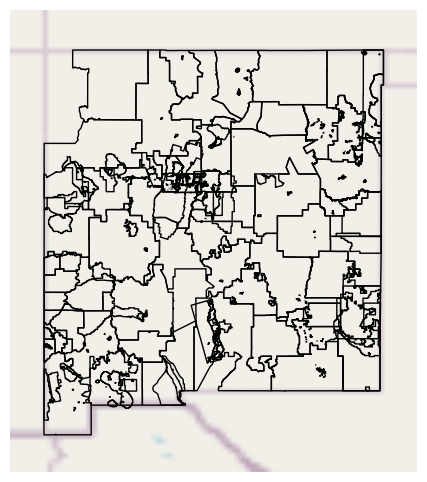

In [9]:
# Map poly info

dfruPoly = dfru.copy()
dfruPoly = dfruPoly[dfruPoly['Geometry'] != ""].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot

    dfruPoly['Geometry'] = gpd.GeoSeries.from_wkt(dfruPoly['Geometry'], crs="EPSG:4326")
    gdfruPoly = gpd.GeoDataFrame(dfruPoly, geometry=dfruPoly['Geometry'], crs="EPSG:4326") # covert to geodataframe
    #gdfruPoly['Geometry'] = gdfruPoly.simplify(0.001) # simplify the geometry. Lower the number the larger the exported file.
    gplt.polyplot(gdfruPoly, ax=ax)
    mplt.savefig(format="png", fname='figures/ReportingUnitMap.png') 
except:
    print('No geometry data to plot')

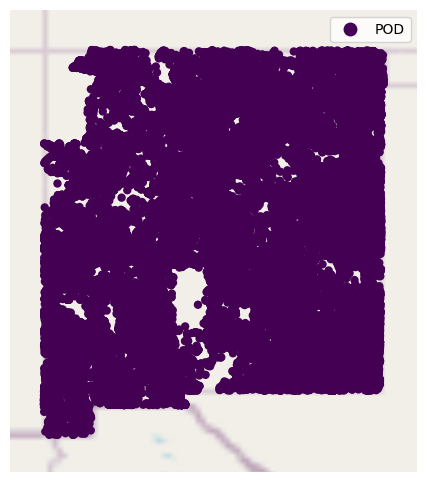

In [10]:
# map the site info (this would be lat & long points only)

dfsPoint = dfs.copy()
dfsPoint = dfsPoint[dfsPoint['RegulatoryOverlayUUIDs'] != ""]
    
try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    
    gdfsPoint = gpd.GeoDataFrame(dfsPoint, geometry=gpd.points_from_xy(dfsPoint.Longitude.astype(float), dfsPoint.Latitude.astype(float)), crs="EPSG:4326")
    gplt.pointplot(gdfsPoint, hue='PODorPOUSite', legend=True, legend_var='hue', ax=ax)
    mplt.savefig(format="png", fname='figures/PointInRegMap.png') 
    
except:
    print('No point data to plot')

# Custom Queries and Analysis for this Dataset

In [ ]:
# asdf